## Final Project Submission

Please fill out:
* Student name:Kennedy Omoro
* Student pace: Full time 
* Instructor name: Faith rotich



## I. Overview

  A company has decided to create a new movie studio. 
  They have hired me to help them better understand the movie industry and make sound decisions based on Analysis   and Science. 

To get started, I was given sets of data obtained from the following sources: 

   * Roten Tomatoes
   * Box Office Mojo
   * IMDB
   * TheMovieDB.org
   * The-Numbers.com
    
I was assigned with the following tasks:
   * Explore the given data and/or find complementary data,
   * **Obtain meaningful, actionable insights** from it that will,
   * Help the new head of the studio decide __What type of films to create?__

## II. Business Problem

###  What type of films to create?

* As I prepare to begin reviewing and understanding the data, I put together a preliminary list of questions that could help answer the ultimate question: *what type of movies to create?*

    * What __type of films__ are currently doing the best at the __box office__?
    * What does __type of films__ mean? The *Genre* becomes relevant right away!
    * What do __people like__?
    * How much does it __cost to make__ each type of movie?
    * Who is my __competition__? And how are they doing?
    * How much __money__ are they making?
  

* The rest of this notebook will be dedicated to Exploring and Understanding the Data

## III. Understanding the Data

* The preliminary questions listed above helped me identify what kind of information I should be looking for within the data.
* Our sources are well-known experts in the subject.
* In this section I will inspect all of the data sets provided using pandas $.head()$ and $.info()$
    #### Objective:
    * Identify if/which datasets provided can help me answer the formulated questions.  
    


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Box Office Mojo Data

In [14]:
df1 = pd.read_csv ('Downloads/bom.movie_gross (2).csv.gz')
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


## THE Numbers Data

In [89]:
df2 = pd.read_csv ('Downloads/tn.movie_budgets.csv.gz')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [90]:
df2['year'] = df2['release_date'].apply(lambda x: x[7:12])

In [91]:
df2['production_budget'] = df2['production_budget'].apply(str).str.replace('$', '')
df2['production_budget'] = df2['production_budget'].apply(str).str.replace(',', '').astype(int)

In [93]:
df2['domestic_gross'] = df2['domestic_gross'].apply(str).str.replace('$', '')
df2['domestic_gross'] = df2['domestic_gross'].apply(str).str.replace(',', '').astype(int)

In [95]:
df2['worldwide_gross'] = df2['worldwide_gross'].apply(str).str.replace('$', '')
df2['worldwide_gross'] = df2['worldwide_gross'].apply(str).str.replace(',', '').astype(float)

In [96]:
df2['year'] = pd.to_numeric(df2['year']).astype(int)

In [97]:
df2 = df2[df2['year'] >= 2010]

In [98]:
numbers_df = df2.drop(columns=['id', 'release_date'])
numbers_df.info()
numbers_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2194 entries, 1 to 5780
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2194 non-null   object 
 1   production_budget  2194 non-null   int32  
 2   domestic_gross     2194 non-null   int32  
 3   worldwide_gross    2194 non-null   float64
 4   year               2194 non-null   int32  
dtypes: float64(1), int32(3), object(1)
memory usage: 77.1+ KB


,movie,production_budget,domestic_gross,worldwide_gross,year
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,2011
2,Dark Phoenix,350000000,42762350,1.497624e+08,2019
3,Avengers: Age of Ultron,330600000,459005868,1.403014e+09,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,2017
5,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,2015


## IMDB DATA

In [17]:
import sqlite3
conn = sqlite3.connect('Downloads/im.db')
cursor = conn.cursor()

In [18]:
query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql(query, conn)
print(tables)

            name
0   movie_basics
1      directors
2      known_for
3     movie_akas
4  movie_ratings
5        persons
6     principals
7        writers


In [36]:
pd.read_sql("SELECT * FROM movie_basics LIMIT 5;", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [37]:
pd.read_sql("SELECT * FROM movie_ratings LIMIT 5;", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [46]:
query = """
SELECT 
    b.movie_id,
    b.primary_title,
    b.original_title,
    b.start_year,
    b.runtime_minutes,
    b.genres,
    r.averagerating,
    r.numvotes
FROM 
    movie_basics AS b
JOIN 
    movie_ratings AS r
ON 
    b.movie_id = r.movie_id
"""
df3 = pd.read_sql_query(query, conn)

In [44]:
df3.to_csv('combined_imdb_data.csv', index=False)

## IV. Data Preparation

With a better understanding of the data, we now know  which questions can be answered and it's time to prepare and clean the data to address the following:

   * **Question 1:** Who is my competition? What are they doing? 
   * **Question 2:** How much does it cost to make a movie?
   * **Question 3:** Profit 
   * **Question 4:** What do people like?
   
   #### Objective: 
   
   * Ideally, we should find a balance between what people like the most and what is most profitable for the studio producer.  Let’s dive in!

In [20]:
# Box office Mojo Data
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [21]:
df1.columns = ['movie' if x == 'title' else x for x in df1.columns]

In [22]:
df1.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018], dtype=int64)

In [23]:
df1.foreign_gross.isna().sum()

1350

In [24]:
df1['foreign_gross'] = df1['foreign_gross'].apply(str).str.replace(",", "").astype(float)

In [25]:
df1['foreign_gross'] = pd.to_numeric(df1['foreign_gross'])

In [26]:
df1['foreign_gross'] = df1['foreign_gross'].fillna(df1['foreign_gross'].median())
df1['domestic_gross'] = df1['domestic_gross'].fillna(df1['domestic_gross'].median())

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   foreign_gross   3387 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [28]:
df1 = df1.dropna() 

Here, I will create a column to combine the foreign_gross and domestic_gross columns.

In [29]:
df1['total_gross'] = df1['foreign_gross'] + df1['domestic_gross']

In [32]:
movie_studio_df = df1

In [34]:
movie_studio_df.info()
movie_studio_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
 5   total_gross     3382 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.0+ KB


,movie,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


Now IMBD DATA

In [48]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [49]:
df3['genres'].isna().sum()

804

In [50]:
df3 = df3.dropna(subset = ['genres'])

In [51]:
# In order to apply str methods to the 'genres' column we need to set the dtype to str
df3['genres'] = [str(i) for i in df3.genres]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11116\936997852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['genres'] = [str(i) for i in df3.genres]


In [52]:
df3 = df3.rename(columns={'primary_title':'movie'})

In [53]:
df3.start_year.unique()

array([2013, 2019, 2018, 2017, 2010, 2011, 2012, 2015, 2016, 2014],
      dtype=int64)

In [56]:
ratings_df = df3.drop(columns=['movie_id', 'runtime_minutes', 'original_title'])

Here, I will create an additional dataframe that will split the genres for those movies with more than one genre

In [59]:
genres_df = ratings_df.set_index('movie').genres.str.split(',',
            expand=True).stack().reset_index(level=1, 
            drop=True).to_frame('genres')

In [60]:
genres_df.info()
genres_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 128490 entries, Sunghursh to Drømmeland
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   genres  128490 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


,genres
movie,
Sunghursh,Action
Sunghursh,Crime
Sunghursh,Drama
One Day Before the Rainy Season,Biography
One Day Before the Rainy Season,Drama


Let's check how our rating is dispersed

In [61]:
ratings_df.describe()

,start_year,averagerating,numvotes
count,73052.000000,73052.000000,7.305200e+04
mean,2014.281430,6.330930,3.562173e+03
std,2.615288,1.474699,3.045804e+04
min,2010.000000,1.000000,5.000000e+00
25%,2012.000000,5.500000,1.400000e+01
50%,2014.000000,6.500000,5.000000e+01
75%,2017.000000,7.400000,2.890000e+02
max,2019.000000,10.000000,1.841066e+06


In [62]:
Q1 = ratings_df['numvotes'].quantile(0.25)
Q3 = ratings_df['numvotes'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

14.0 289.0 275.0


In [63]:
ratings_df = ratings_df[ratings_df['numvotes'] >= Q1]

In [64]:
ratings_df = ratings_df[ratings_df['numvotes'] <= Q3]

In [65]:
ratings_df.describe()

,start_year,averagerating,numvotes
count,37283.000000,37283.000000,37283.000000
mean,2014.341121,6.236606,77.920715
std,2.625324,1.494105,69.794409
min,2010.000000,1.000000,14.000000
25%,2012.000000,5.300000,24.000000
50%,2014.000000,6.400000,49.000000
75%,2017.000000,7.300000,111.000000
max,2019.000000,10.000000,289.000000


In [66]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37283 entries, 0 to 73852
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie          37283 non-null  object 
 1   start_year     37283 non-null  int64  
 2   genres         37283 non-null  object 
 3   averagerating  37283 non-null  float64
 4   numvotes       37283 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.7+ MB


## Question 1: Who is my competition?

Who is my competition?: 
   * Top 10 Studios producing the most films. 
   * Top 10 Studios making the highest gross income in average. 

In [69]:
movie_studio_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3382 entries, 0 to 3386
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3382 non-null   float64
 3   foreign_gross   3382 non-null   float64
 4   year            3382 non-null   int64  
 5   total_gross     3382 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 185.0+ KB


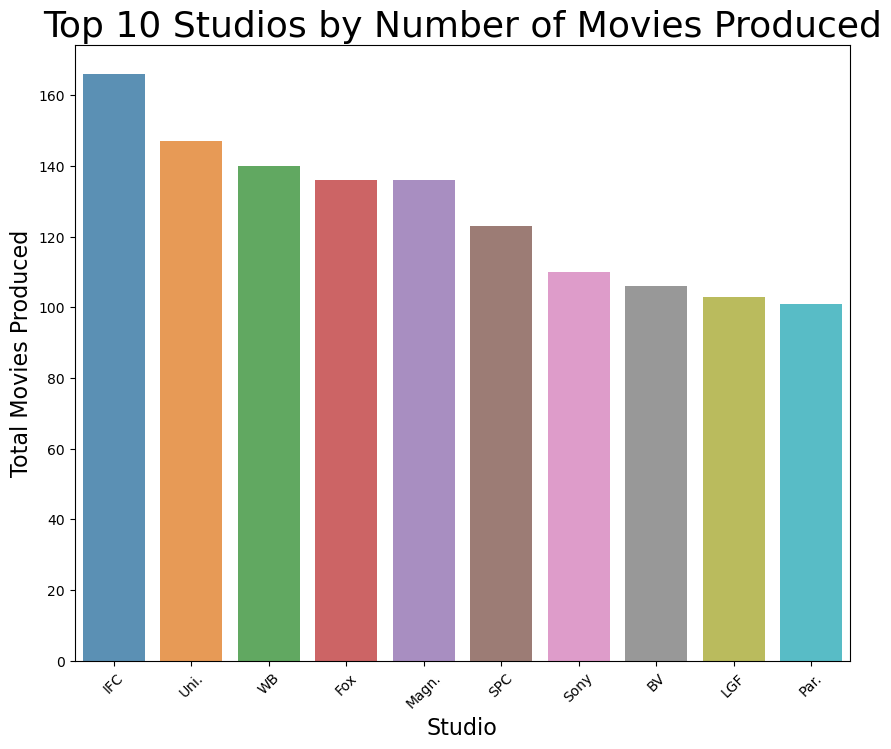

In [71]:
studio_count = movie_studio_df['studio'].value_counts()
studio_count = studio_count[:10]  

plt.figure(figsize=(10,8))
sns.barplot(x=studio_count.index, y=studio_count.values, alpha=0.8)
plt.title('Top 10 Studios by Number of Movies Produced', fontsize=26)
plt.ylabel('Total Movies Produced', fontsize=16)
plt.xlabel('Studio', fontsize=16) 
plt.show()

In [72]:
studios_grp = movie_studio_df.groupby(['studio'])

In [73]:
mean_gross = studios_grp['total_gross'].mean()
mean_gross.sort_values(ascending=False, inplace=True)

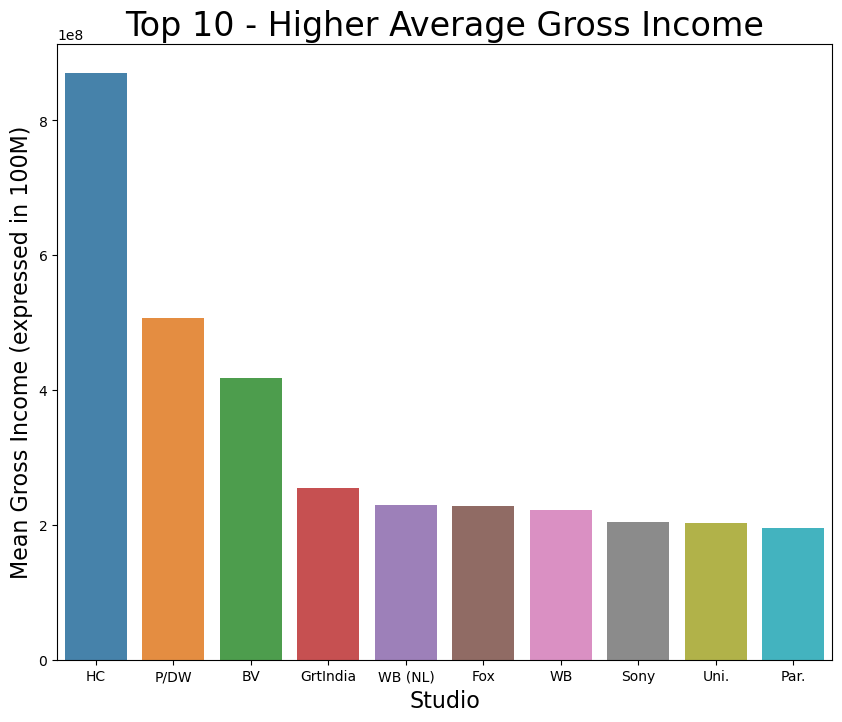

In [76]:
mean_gross = mean_gross[:10]  

plt.figure(figsize=(10,8))

sns.barplot(x=mean_gross.index, y=mean_gross.values, alpha=0.9)

plt.title('Top 10 - Higher Average Gross Income', fontsize=24)
plt.ylabel('Mean Gross Income (expressed in 100M)', fontsize=16)
plt.xlabel('Studio', fontsize=16) 

plt.show()

In [77]:
studios_df.loc[studios_df['studio'].isin(['HC', 'P/DW','GrtIndia'])]

,movie,studio,domestic_gross,foreign_gross,year,total_gross
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
9,How to Train Your Dragon,P/DW,217600000.0,277300000.0,2010,4.949000e+08
17,Megamind,P/DW,148400000.0,173500000.0,2010,3.219000e+08
71,Dinner for Schmucks,P/DW,73000000.0,13800000.0,2010,8.680000e+07
329,Transformers: Dark of the Moon,P/DW,352400000.0,771400000.0,2011,1.123800e+09
333,Kung Fu Panda 2,P/DW,165200000.0,500400000.0,2011,6.656000e+08
338,Puss in Boots,P/DW,149300000.0,405700000.0,2011,5.550000e+08
734,Madagascar 3: Europe's Most Wanted,P/DW,216400000.0,530500000.0,2012,7.469000e+08
752,Rise of the Guardians,P/DW,103400000.0,203500000.0,2012,3.069000e+08
865,A Thousand Words,P/DW,18500000.0,3600000.0,2012,2.210000e+07


HC studio made it to the Top 1 with just one movie (Wolf Warrior 2) of chinese origin. The Top 2 studio, Paramount/DreamWorks made mostly animated movies. The Top 4 GRT India from India, also made it with just one movie! Notice also the difference between foreign and domestic gross. for our foreign movies.


In [78]:
correlation = mean_gross.corr(studio_count)
correlation

-0.34479787354052405

 This indicates that a higher number of movies produced, does not imply higher revenue.

### Inferences:

   * Making more movies does not mean making more money.
   * Movie industry is mostly centralized in the USA.
   * Interesting presence of China, India and Argentina in our Top 10's.


## Question 2: What about the numbers?  

    
   * Top 10 most produced Genres
   * Average Budget per Genre
   * Caculate Profit by Genre
   * Calculate Gross Profit Margin by Genre (how much money in return per every dollar invested)

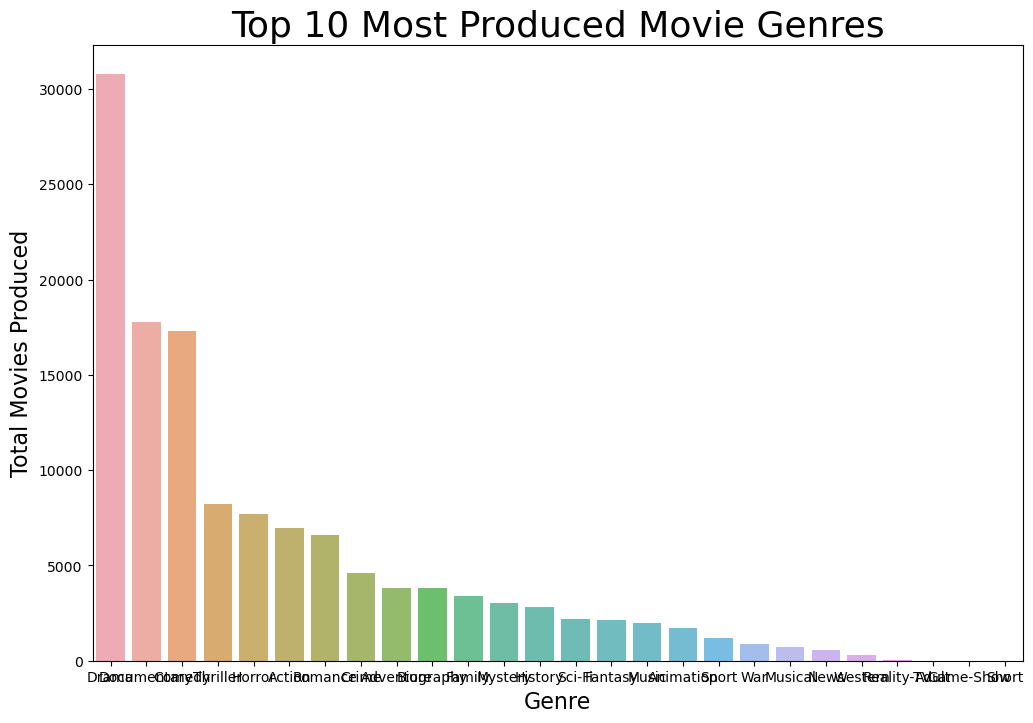

In [102]:
genres_count = genres_df['genres'].value_counts()

plt.figure(figsize=(12,8))

sns.barplot(x=genres_count.index, y=genres_count.values, alpha=0.8)

plt.title('Top 10 Most Produced Movie Genres', fontsize=26)
plt.ylabel('Total Movies Produced', fontsize=16)
plt.xlabel('Genre', fontsize=16)



plt.show()

In [104]:
numbers_by_genre['gross_profit'] = numbers_by_genre['worldwide_gross'] - numbers_by_genre['production_budget']

In [105]:
numbers_by_genre['worldwide_gross'].replace(0, 1)

0       1.045664e+09
1       1.045664e+09
2       1.045664e+09
3       1.497624e+08
4       1.497624e+08
            ...     
5605    1.000000e+00
5606    1.000000e+00
5607    1.000000e+00
5608    1.000000e+00
5609    1.000000e+00
Name: worldwide_gross, Length: 5610, dtype: float64

In [106]:
numbers_by_genre['gross_margin'] = (
    numbers_by_genre['gross_profit'].div(numbers_by_genre['worldwide_gross'])*100)

In [107]:
numbers_by_genre = numbers_by_genre[numbers_by_genre['gross_margin'] >= 0]
numbers_by_genre.info()
numbers_by_genre.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3533 entries, 0 to 5599
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              3533 non-null   object 
 1   genres             3331 non-null   object 
 2   production_budget  3533 non-null   int32  
 3   domestic_gross     3533 non-null   int32  
 4   worldwide_gross    3533 non-null   float64
 5   year               3533 non-null   int32  
 6   gross_profit       3533 non-null   float64
 7   gross_margin       3533 non-null   float64
dtypes: float64(3), int32(3), object(2)
memory usage: 207.0+ KB


,movie,genres,production_budget,domestic_gross,worldwide_gross,year,gross_profit,gross_margin
0,Pirates of the Caribbean: On Stranger Tides,Action,410600000,241063875,1.045664e+09,2011,6.350639e+08,60.733080
1,Pirates of the Caribbean: On Stranger Tides,Adventure,410600000,241063875,1.045664e+09,2011,6.350639e+08,60.733080
2,Pirates of the Caribbean: On Stranger Tides,Fantasy,410600000,241063875,1.045664e+09,2011,6.350639e+08,60.733080
6,Avengers: Age of Ultron,Action,330600000,459005868,1.403014e+09,2015,1.072414e+09,76.436443
7,Avengers: Age of Ultron,Adventure,330600000,459005868,1.403014e+09,2015,1.072414e+09,76.436443


In [108]:
genre_grp = numbers_by_genre.groupby(numbers_by_genre.genres)

In [109]:
mean_budget = genre_grp['production_budget'].mean()
mean_budget.sort_values(ascending=False, inplace=True)

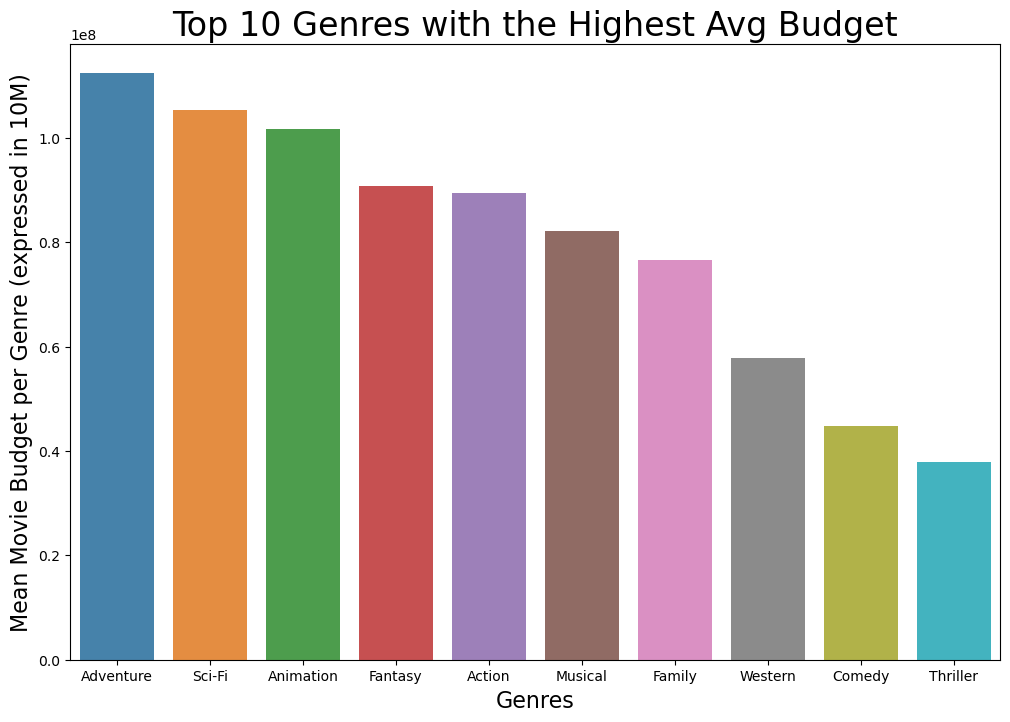

In [110]:
mean_budget = mean_budget[:10] 

plt.figure(figsize=(12,8))

sns.barplot(x=mean_budget.index, y=mean_budget.values, alpha=0.9)

plt.title('Top 10 Genres with the Highest Avg Budget', fontsize=24)
plt.ylabel('Mean Movie Budget per Genre (expressed in 10M)', fontsize=16)
plt.xlabel('Genres', fontsize=16)

plt.show()

In [111]:
mean_profit = genre_grp['gross_profit'].mean()
mean_profit.sort_values(ascending=False, inplace=True)

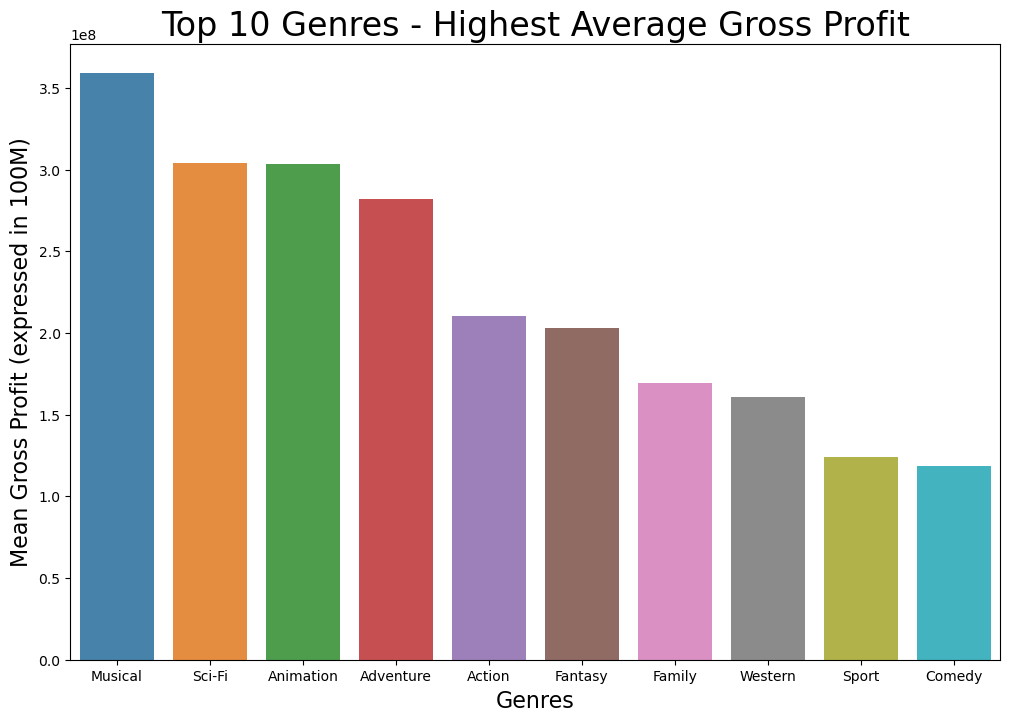

In [112]:
mean_profit = mean_profit[:10]   

plt.figure(figsize=(12,8))

sns.barplot(x=mean_profit.index, y=mean_profit.values, alpha=0.9)

plt.title('Top 10 Genres - Highest Average Gross Profit', fontsize=24)
plt.ylabel('Mean Gross Profit (expressed in 100M)', fontsize=16)
plt.xlabel('Genres', fontsize=16)



plt.show()

In [113]:
correlation1 = mean_profit.corr(mean_budget)
correlation1

0.7292965816142425

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


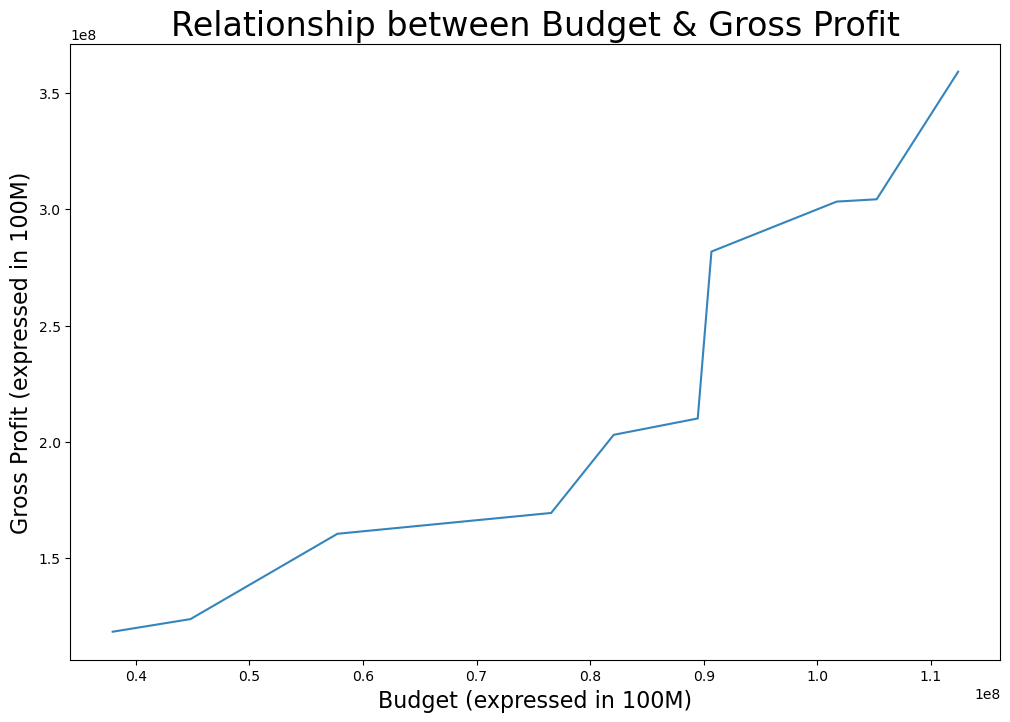

In [114]:
plt.figure(figsize=(12,8))

sns.lineplot(x=mean_budget.values, y=mean_profit.values, alpha=0.9)

plt.title('Relationship between Budget & Gross Profit', fontsize=24)
plt.ylabel('Gross Profit (expressed in 100M)', fontsize=16)
plt.xlabel('Budget (expressed in 100M)', fontsize=16)

plt.show()

next we will define the mean gross profit margin. This represents how much is each genre getting in return per every dollar invested.

In [115]:
mean_margin = genre_grp['gross_margin'].mean().round(decimals=2)
mean_margin.sort_values(ascending=False, inplace=True)
mean_margin = mean_margin[:12,]

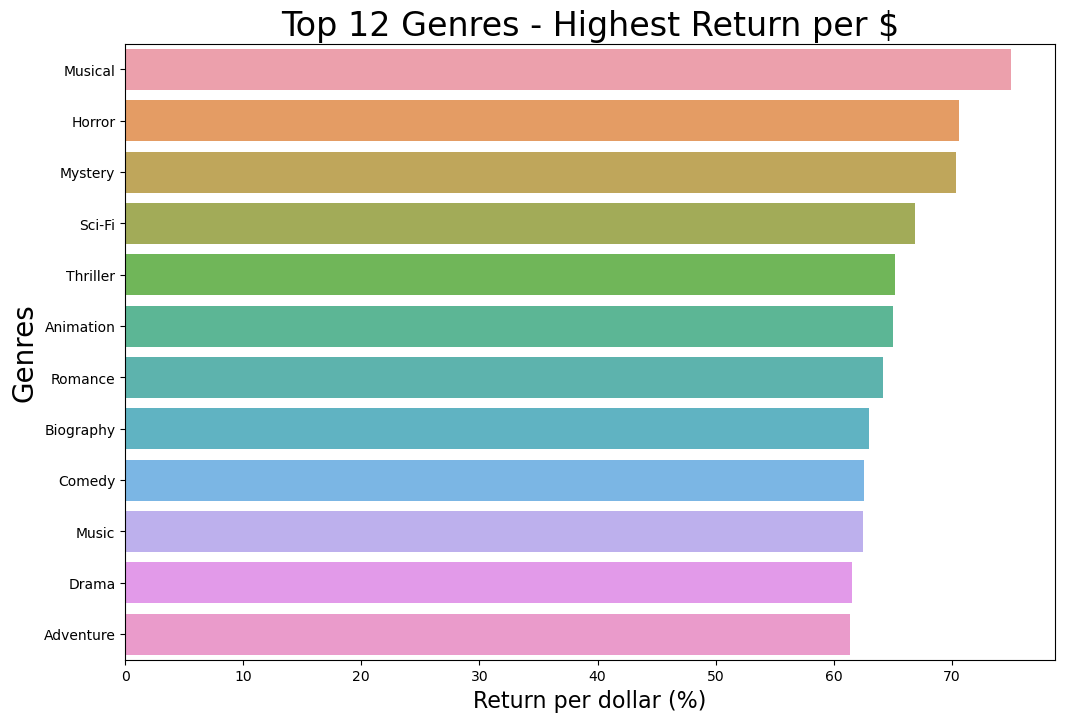

In [116]:
plt.figure(figsize=(12,8))

sns.barplot(x=mean_margin.values, y=mean_margin.index, alpha=0.9)

plt.title('Top 12 Genres - Highest Return per $', fontsize=24)
plt.ylabel('Genres', fontsize=20)
plt.xlabel('Return per dollar (%)', fontsize=16)

plt.show()

In [117]:
correlation2 = mean_budget.corr(mean_margin)
correlation2

0.029331000411372318

C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Administrator\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


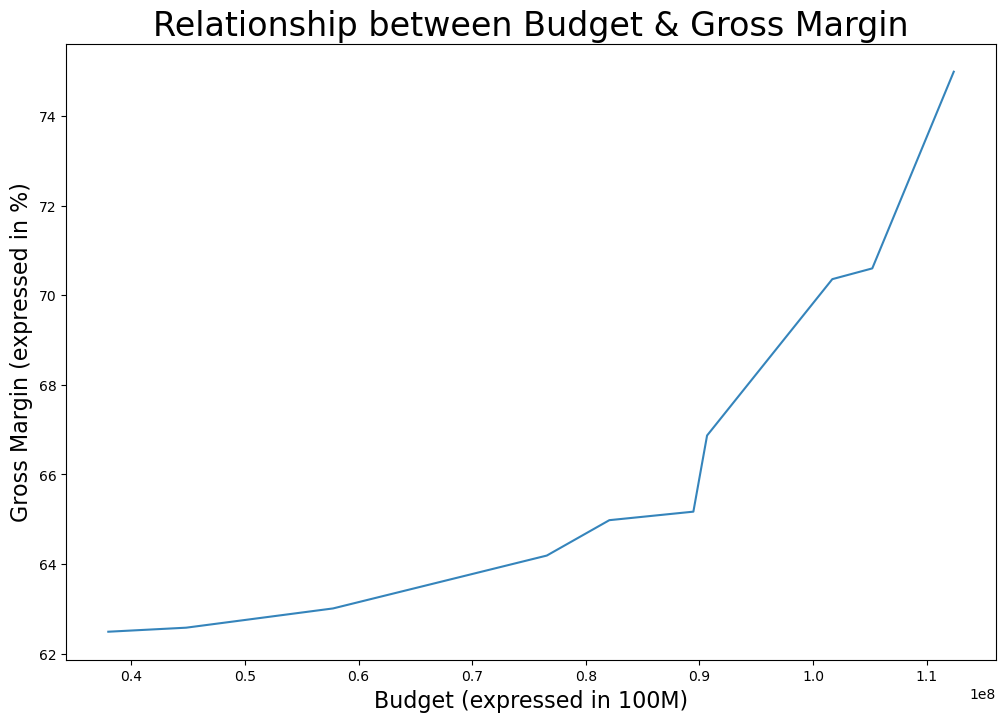

In [118]:
mean_margin = mean_margin[:10]
plt.figure(figsize=(12, 8))

sns.lineplot(x=mean_budget.values, y=mean_margin.values, alpha=0.9)

plt.title('Relationship between Budget & Gross Margin', fontsize=24)
plt.ylabel('Gross Margin (expressed in %)', fontsize=16)
plt.xlabel('Budget (expressed in 100M)', fontsize=16)


plt.show()

### Inferences:
 * Drama, Documentary and Comedy are the Top 3 most produced genres.
 * The Highest Average Budgets are between 4 and 10 million.
 * The Top 12 Average Gross Profit Margin are above a 60% return. 
 * There's a positive correlation between Budget, Gross Profit and Gross Proftit Margin for our Top 10 Genres.
 * Comedy, Adventure and Sci-Fi appear in all Top 10's.

## Question 3: What do people like?

 * Top 10 Best Rated Genres
 

In [84]:
ratings_by_genre = pd.merge(ratings_df, genres_df, on='movie', how='inner')

In [85]:
genre_grp = ratings_by_genre.groupby(ratings_by_genre.genres_y)

In [86]:
mean_rating = genre_grp['averagerating'].mean()
mean_rating.sort_values(ascending=False, inplace=True)

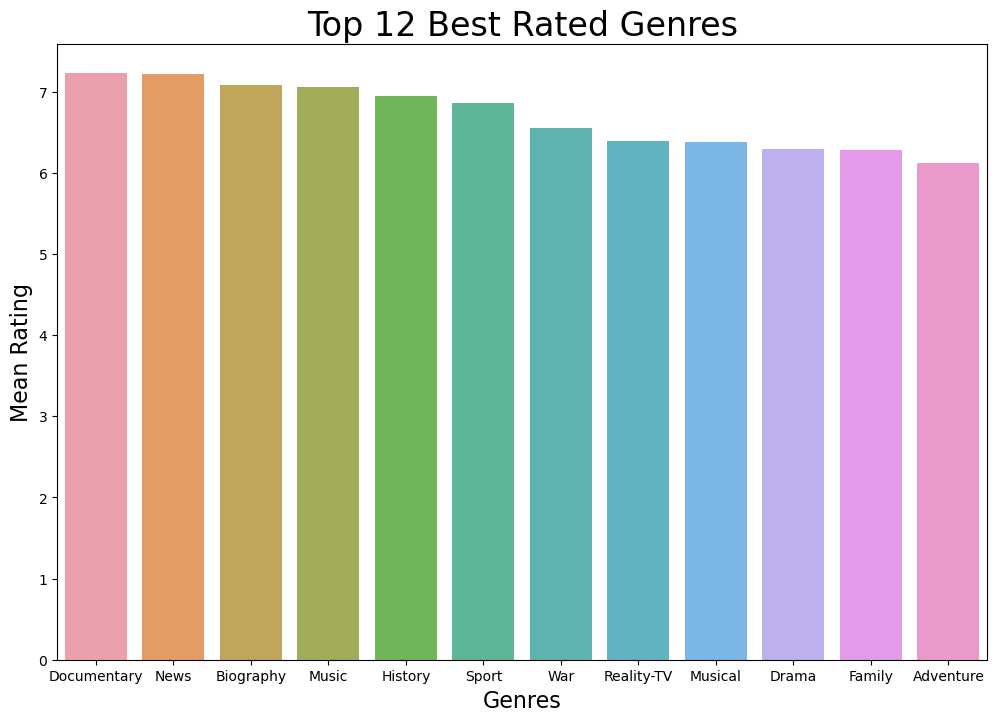

In [87]:
mean_rating = mean_rating[:12]

plt.figure(figsize=(12,8))

sns.barplot(x=mean_rating.index, y=mean_rating.values, alpha=0.9)

plt.title('Top 12 Best Rated Genres', fontsize=24)
plt.ylabel('Mean Rating', fontsize=16)
plt.xlabel('Genres', fontsize=16)


plt.show()

Finally, I will calculate the correlation between rating and gross profit margin.

In [119]:
correlation = mean_rating.corr(mean_margin)
correlation

-0.9979847930864609

### Inferences
 * In our bar plot we saw how the Top 3 best rated Genres did not apper in our previous Top 10's.
 * A slightly negative correlation between Ratings and Profit Margin reveal that most profitable does not always mean best rated.
 * Music, Musical, Drama, Biography and Adventure are well rated and also highly profitable.